# K-nearest Neighbor (KNN) Classification

<center>Resources</center>

https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1985-IEEE_TSMC-Keller.pdf

In [1]:
import numpy as np

def knn(x, X, Y, k):
    def euclidean(X, x):
        return np.sqrt(np.sum((X - x)**2, axis = 1))
    distances = euclidean(X, x)
    
    indices = np.argpartition(distances, k)[:k]
    unique, counts = np.unique(Y[indices], return_counts = True)
    
    if np.count_nonzero(np.max(counts) == np.array(counts)) == 1:
        return unique[np.argmax(counts)]
    else:
        return sY[np.argmin(distances[indices])]
    
    

(300, 2)
(300,)


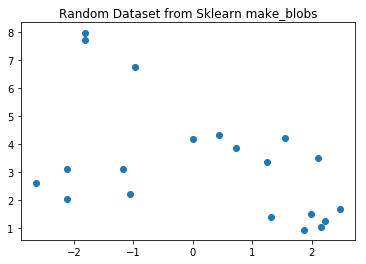

In [40]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

print(X.shape)

rng = np.random.default_rng()
def train_test_split(X,y,indices_or_sections,rng,):
    ind = np.arange(len(X))
    print(ind.shape)
    np.random.shuffle(ind)
    ind = np.split(ind, indices_or_sections = indices_or_sections, axis = 0)
    
    x_train = X[ind[0]]; y_train = y[ind[0]]
    
    x_test = X[ind[1]]; y_test = y[ind[1]]
    
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = train_test_split(X,y,[20],rng)
    
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.title('Random Dataset from Sklearn make_blobs')
plt.show()

In [44]:
preds = []
for x in x_test:
    preds.append(knn(x, x_train, y_train, 3))
    
acc = np.count_nonzero(np.array(preds) == y_test) / len(preds) * 100

print(f'accuracy is {acc}% with {len(x_train)} training samples')

accuracy is 99.64285714285714% with 20 training samples


In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3,)
model.fit(x_train, y_train)
skl_preds = model.predict(x_test)

acc = np.count_nonzero(np.array(skl_preds) == y_test) / len(skl_preds) * 100

print(f'accuracy is {acc}% with {len(x_train)} training samples')

accuracy is 99.64285714285714% with 20 training samples


### 1. Type of Data
* Clusterable data

### 2. Use Case
* When you have pre-labeled data
* When high accuracy is needed

### 3. Application
* Any clustering job as a starting point

### 4. Basic Concept
* The sample takes on the most prevalent class in the k points closest to it

### 5. Assumptions
* K can be well predicted
* There are clusters

### 6. Existing solutions
* Sklearn KNeighborsClassifier

### 7. Strengths and Weaknesses
#### Strengths
* Easy to use
* Works well when samples are available

#### Weaknesses
* Struggles on data where clustering are less defined
* Need labeled data
* Slow on large datasets because distances must be computed for all points